In [1]:
import awkward as ak
import numpy as np
import coffea
import os
from plugins import handleData

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import hist

# testFiles = [
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_170to300_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/0CDD30E0-B953-E54B-BB7A-BFB45BE6EC93.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_300to470_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/3788BBD3-3B70-BE48-B01A-4FA395E1E0B6.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_470to600_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/F6B6A983-3E2B-7B4D-A2CE-E03AB6E32387.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_600to800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/FDF7FBE4-9226-994A-BD45-29995A3CD62F.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/2CEB03D7-5B1A-EE46-9C21-13ED3E349AF4.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/DB87A517-0584-1A41-BB18-AAE7C9AAE5B8.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/BFE2E7E9-82CB-FE47-9B43-EBA5C373AF60.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/5213B536-BAA1-CC43-A58A-B1E41E2680F5.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/E8400F91-3216-EA46-A9F1-8CC7EF5261B0.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/B21BFDD8-B878-784C-AFB6-5CDE131F5C39.root"
# ]

# redirector = 'root://xcache/'
# files = handleData('fileset_QCD.json', redirector, testing = True, data = False)
# # # files_test = handleData('fileset_QCD.json', redirector, testing = False, data = False)

# events = NanoEventsFactory.from_root(list(files.values())[9][0], schemaclass=NanoAODSchema).events()
# # print(files)
# #may have to put in weights by hand
# print(events.Generator.weight)

0.7.11


In [2]:
from plugins import *
from jetProcessors import makeDijetHists
from dask.distributed import Client
import pickle


data_bool = False
winterfell = True
processor = makeDijetHists(data = data_bool)
datastring = "JetHT" if processor.do_gen == False else "QCDsim"
if processor.do_gen==True and winterfell:
    filename = "QCD_flat_files.json"
elif processor.do_gen==True:
    filename = "fileset_QCD.json"
else:
    filename = "datasets_UL_NANOAOD.json"
fname = 'coffeaOutput/dijetHists_{}_{}_{}_NewHist.pkl'.format(datastring, processor.ptcut, processor.etacut)
result = runCoffeaJob(processor, jsonFile = filename, winterfell = winterfell, testing = True, data = not processor.do_gen)
with open(fname, "wb") as f:
    pickle.dump( result, f)

0.7.11
2.5.2
Data:  False  gen  True
Era:  UL16
Era:  UL17NanoAODv9
Era:  UL18NanoAODv9
dataset =  /RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/
dataset =  /RunIISummer20UL17NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/
dataset =  /RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/
Running locally


Preprocessing:   0%|          | 0/3 [00:00<?, ?file/s]

Processing:   0%|          | 0/14 [00:00<?, ?chunk/s]

Lenght of events  99000 length of weights  99000
DOING GEN
Initial # of events:   99000
After kin. sel.: len of events  48174 len of weights  48174
Dphi:  [True, True, True, True, True, True, True, ... True, True, True, True, True, True]
After topo sel: len of events  47817 len of weights  47817
Misses  [False, False, False, False, True, False, ... False, False, False, False, False]
Reco sel: len of events  42952 len of weights  42952
Reco kine/topo sel: len of events  42686 len of weights  42686
Number of fake jets  42686  number of events  42686
Lenght of events  42669 length of weights  42669
Length of gen subjets:  [[{eta: 0.499, mass: 4.34, phi: -1.56, pt: 380}, ... mass: 13.3, phi: 2.7, pt: 249}]]
Genjet and subjet combinations:  [[({eta: 0.502, mass: 24.6, phi: -1.57, pt: 458, ... phi: 2.7, pt: 249})]]
Genjet and subjet combinations:  [[({eta: 1.15, mass: 48.8, phi: 1.54, pt: 401, ... phi: 2.7, pt: 249})]]
Groomed gen jets:  [{x: 1.44, y: -434, z: 227, t: 490}, ... y: -4.45e+03,

Groomed gen jets:  [{x: -427, y: -346, z: 837, t: 1.01e+03}, ... y: -886, z: 1.19e+03, t: 2.49e+03}] <class 'coffea.nanoevents.methods.vector.LorentzVectorArray'> {x: 34512, y: 34512, z: 34512, t: 34512}
Number of matched dijet events 34512
{'dr_reco_to_gen_subjet': Hist(
  StrCategory([], growth=True, name='dataset', label='Dataset'),
  Regular(150, 0, 6, name='dr', label='$\\Delta R$'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0), 'jet_ptasymm_gen': Hist(
  StrCategory(['/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/', '/RunIISummer20UL17NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/', '/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/'], growth=True, name='dataset', label='Dataset'),
  Regular(10, 0, 1, name='frac', label='Fraction'),
  storage=Weight()) # Sum: WeightedSum(value=639097, variance=639097), 'njet_gen': Hist(
  StrCategory(['/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13Te

In [3]:
with open(fname, "rb") as f:
    result = pickle.load( f )
import matplotlib.pyplot as plt
%matplotlib inline
#import mplhep as hep
plt.rcParams["figure.figsize"] = (10,10)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe23b9ebbb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

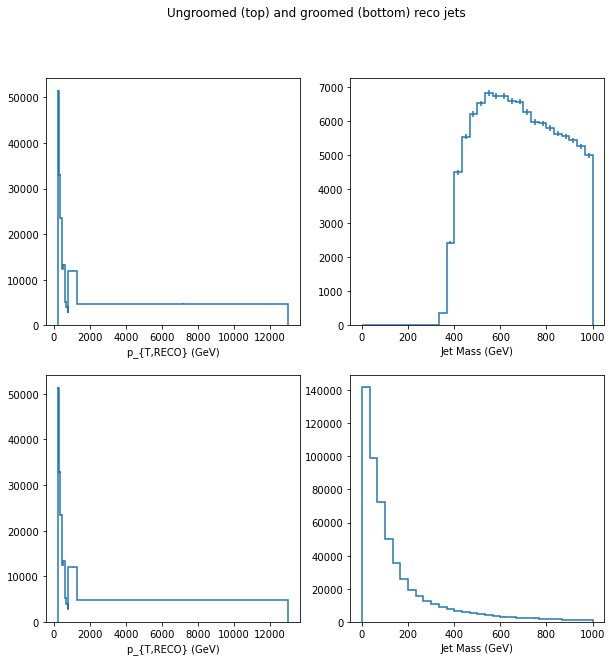

In [4]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed (top) and groomed (bottom) reco jets')
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0])
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1])
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0])
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])

[48100. 36032. 29639. 17910. 22783. 10299.  9116.  6580. 44428. 54681.] [ 90868.  74364.  66264.  43364.  58435.  28173.  25709.  19906. 157711.
 540406.]


Text(0.5, 0.98, 'Gluon content as a function of pT')

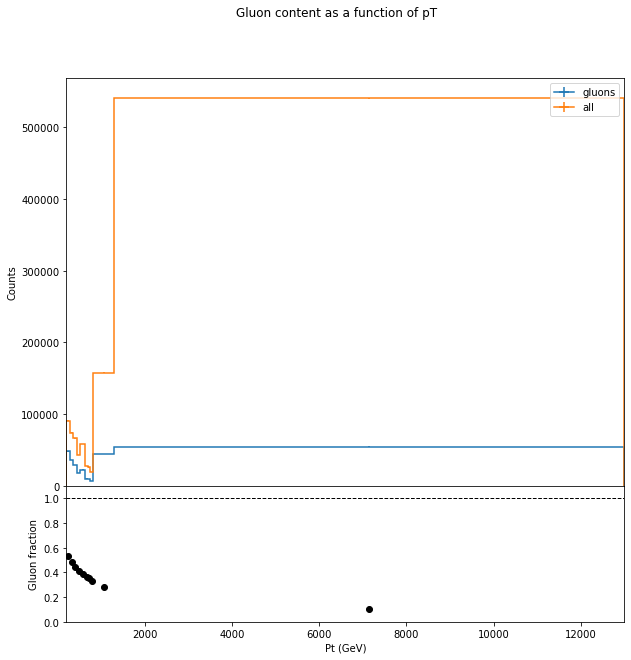

In [5]:
numerator = result['jet_pt'][{'partonFlav':'Gluon'}].project('ptreco')
denominator = result['jet_pt'].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_ax = fig.add_subplot(grid[0])
subplot_ax = fig.add_subplot(grid[1], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')

[25898. 25827. 24621. 23136. 22165. 20652. 18761. 17436. 15946. 14066.
 12659. 11131.  9665.  8813.  7911.  7142.  6291.  5165.  4318.  3823.
  3081.  2750.  2184.  1881.  1276.] [144123. 133209. 118388. 101889.  88437.  76631.  66147.  57931.  50870.
  43836.  38178.  32794.  27840.  24557.  21916.  20454.  17360.  14557.
  12472.  10753.   9002.   7844.   6601.   5477.   3992.]


Text(0.5, 1.0, 'Gluon content as a function of eta')

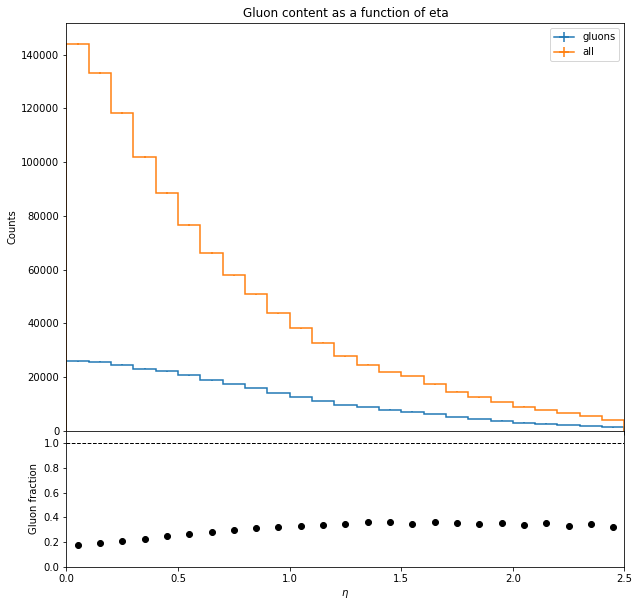

In [6]:
numerator = result['jet_eta'][{'partonFlav':'Gluon'}].project('eta')
denominator = result['jet_eta'].project('eta')
print(numerator.values(), denominator.values())
numerator.label = r'$\epsilon$'
numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_axis = fig.add_subplot(grid[0])
ratio_ax = fig.add_subplot(grid[1], sharex=main_axis)
plt.setp(main_axis.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_axis,"ratio_ax":ratio_ax}
)

plt.xlabel(r'$\eta$')
plt.ylabel("Gluon fraction")
main_axis.set_title('Gluon content as a function of eta')


Text(0.5, 0.98, 'Dijet eta <2.5, pt> 200.')

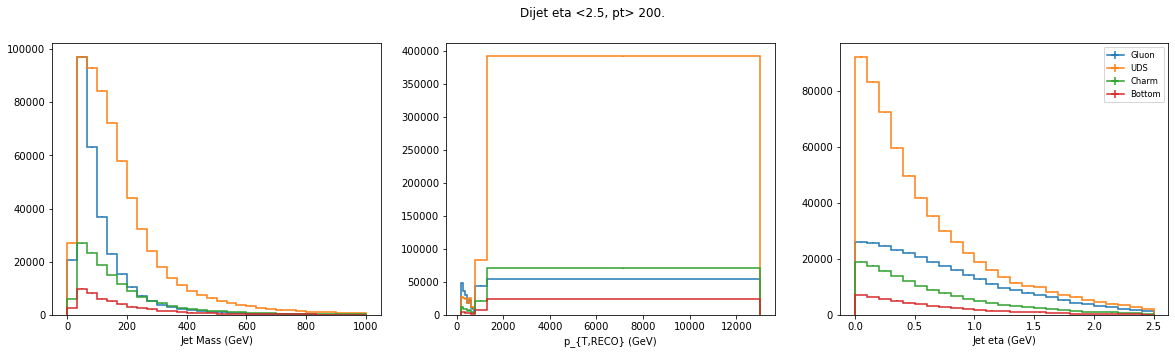

In [7]:
#sum entries in bins --> plot as y-axis
plt.rcParams["figure.figsize"] = (20,5)


fig, axs = plt.subplots(1, 3)
result['jet_mass'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")

fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Hist(
  StrCategory(['/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/', '/RunIISummer20UL17NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/', '/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/'], growth=True, name='dataset', label='Dataset'),
  StrCategory(['jet1', 'jet2'], growth=True, name='jetNumb', label='Jet'),
  StrCategory(['Gluon', 'UDS', 'Charm', 'Bottom'], growth=True, name='partonFlav', label='Parton Flavour'),
  Regular(30, 0, 1000, name='mreco', label='Jet Mass (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.12734e+06, variance=1.12734e+06) (WeightedSum(value=1.13538e+06, variance=1.13538e+06) with flow)


Text(0.5, 0.98, 'Dijet eta <2.5, pt> 200.')

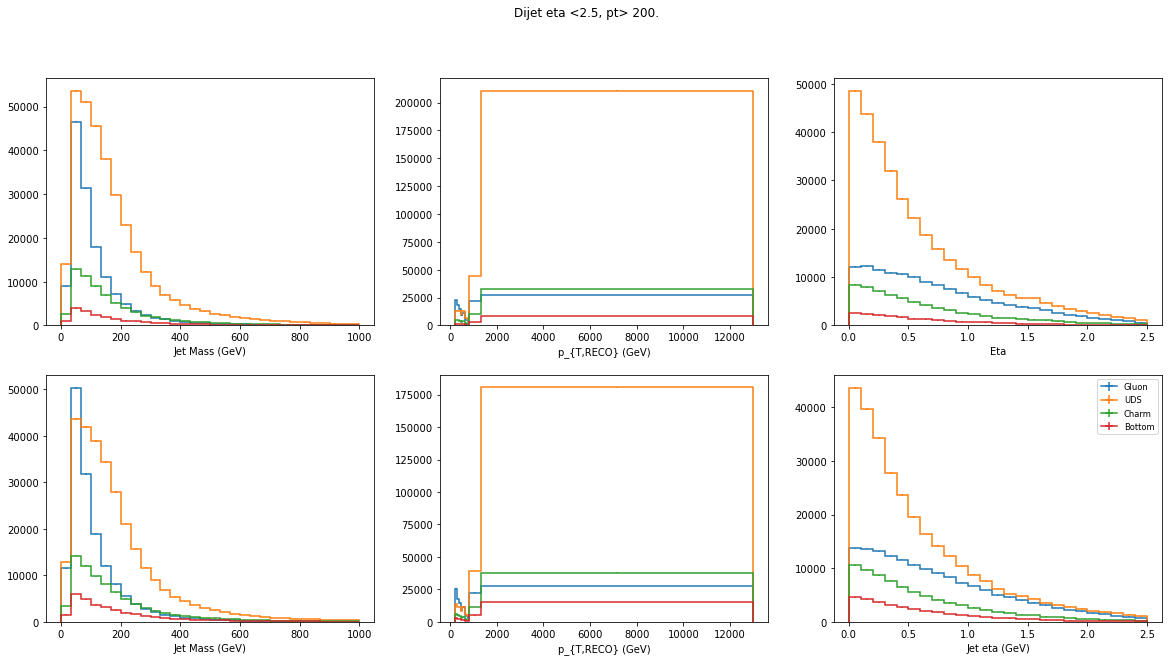

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

In [9]:
njets=result['cutflow']['nJets']
ngluonjets=result['cutflow']['nGluonJets']
print(result['cutflow'])
print("Gluon purity:", ngluonjets/njets)

defaultdict_accumulator(<class 'int'>, {'misses': 634931, 'matched': 567692, 'nGluonJets': 296636, 'nJets': 1135384, 'chunks': 14})
Gluon purity: 0.2612649112546944


In [10]:
response_matrix_u_values = result['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_g_values = result['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [11]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape

In [12]:
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
print(ak.max(response_matrix_u_final))

65.0


In [13]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

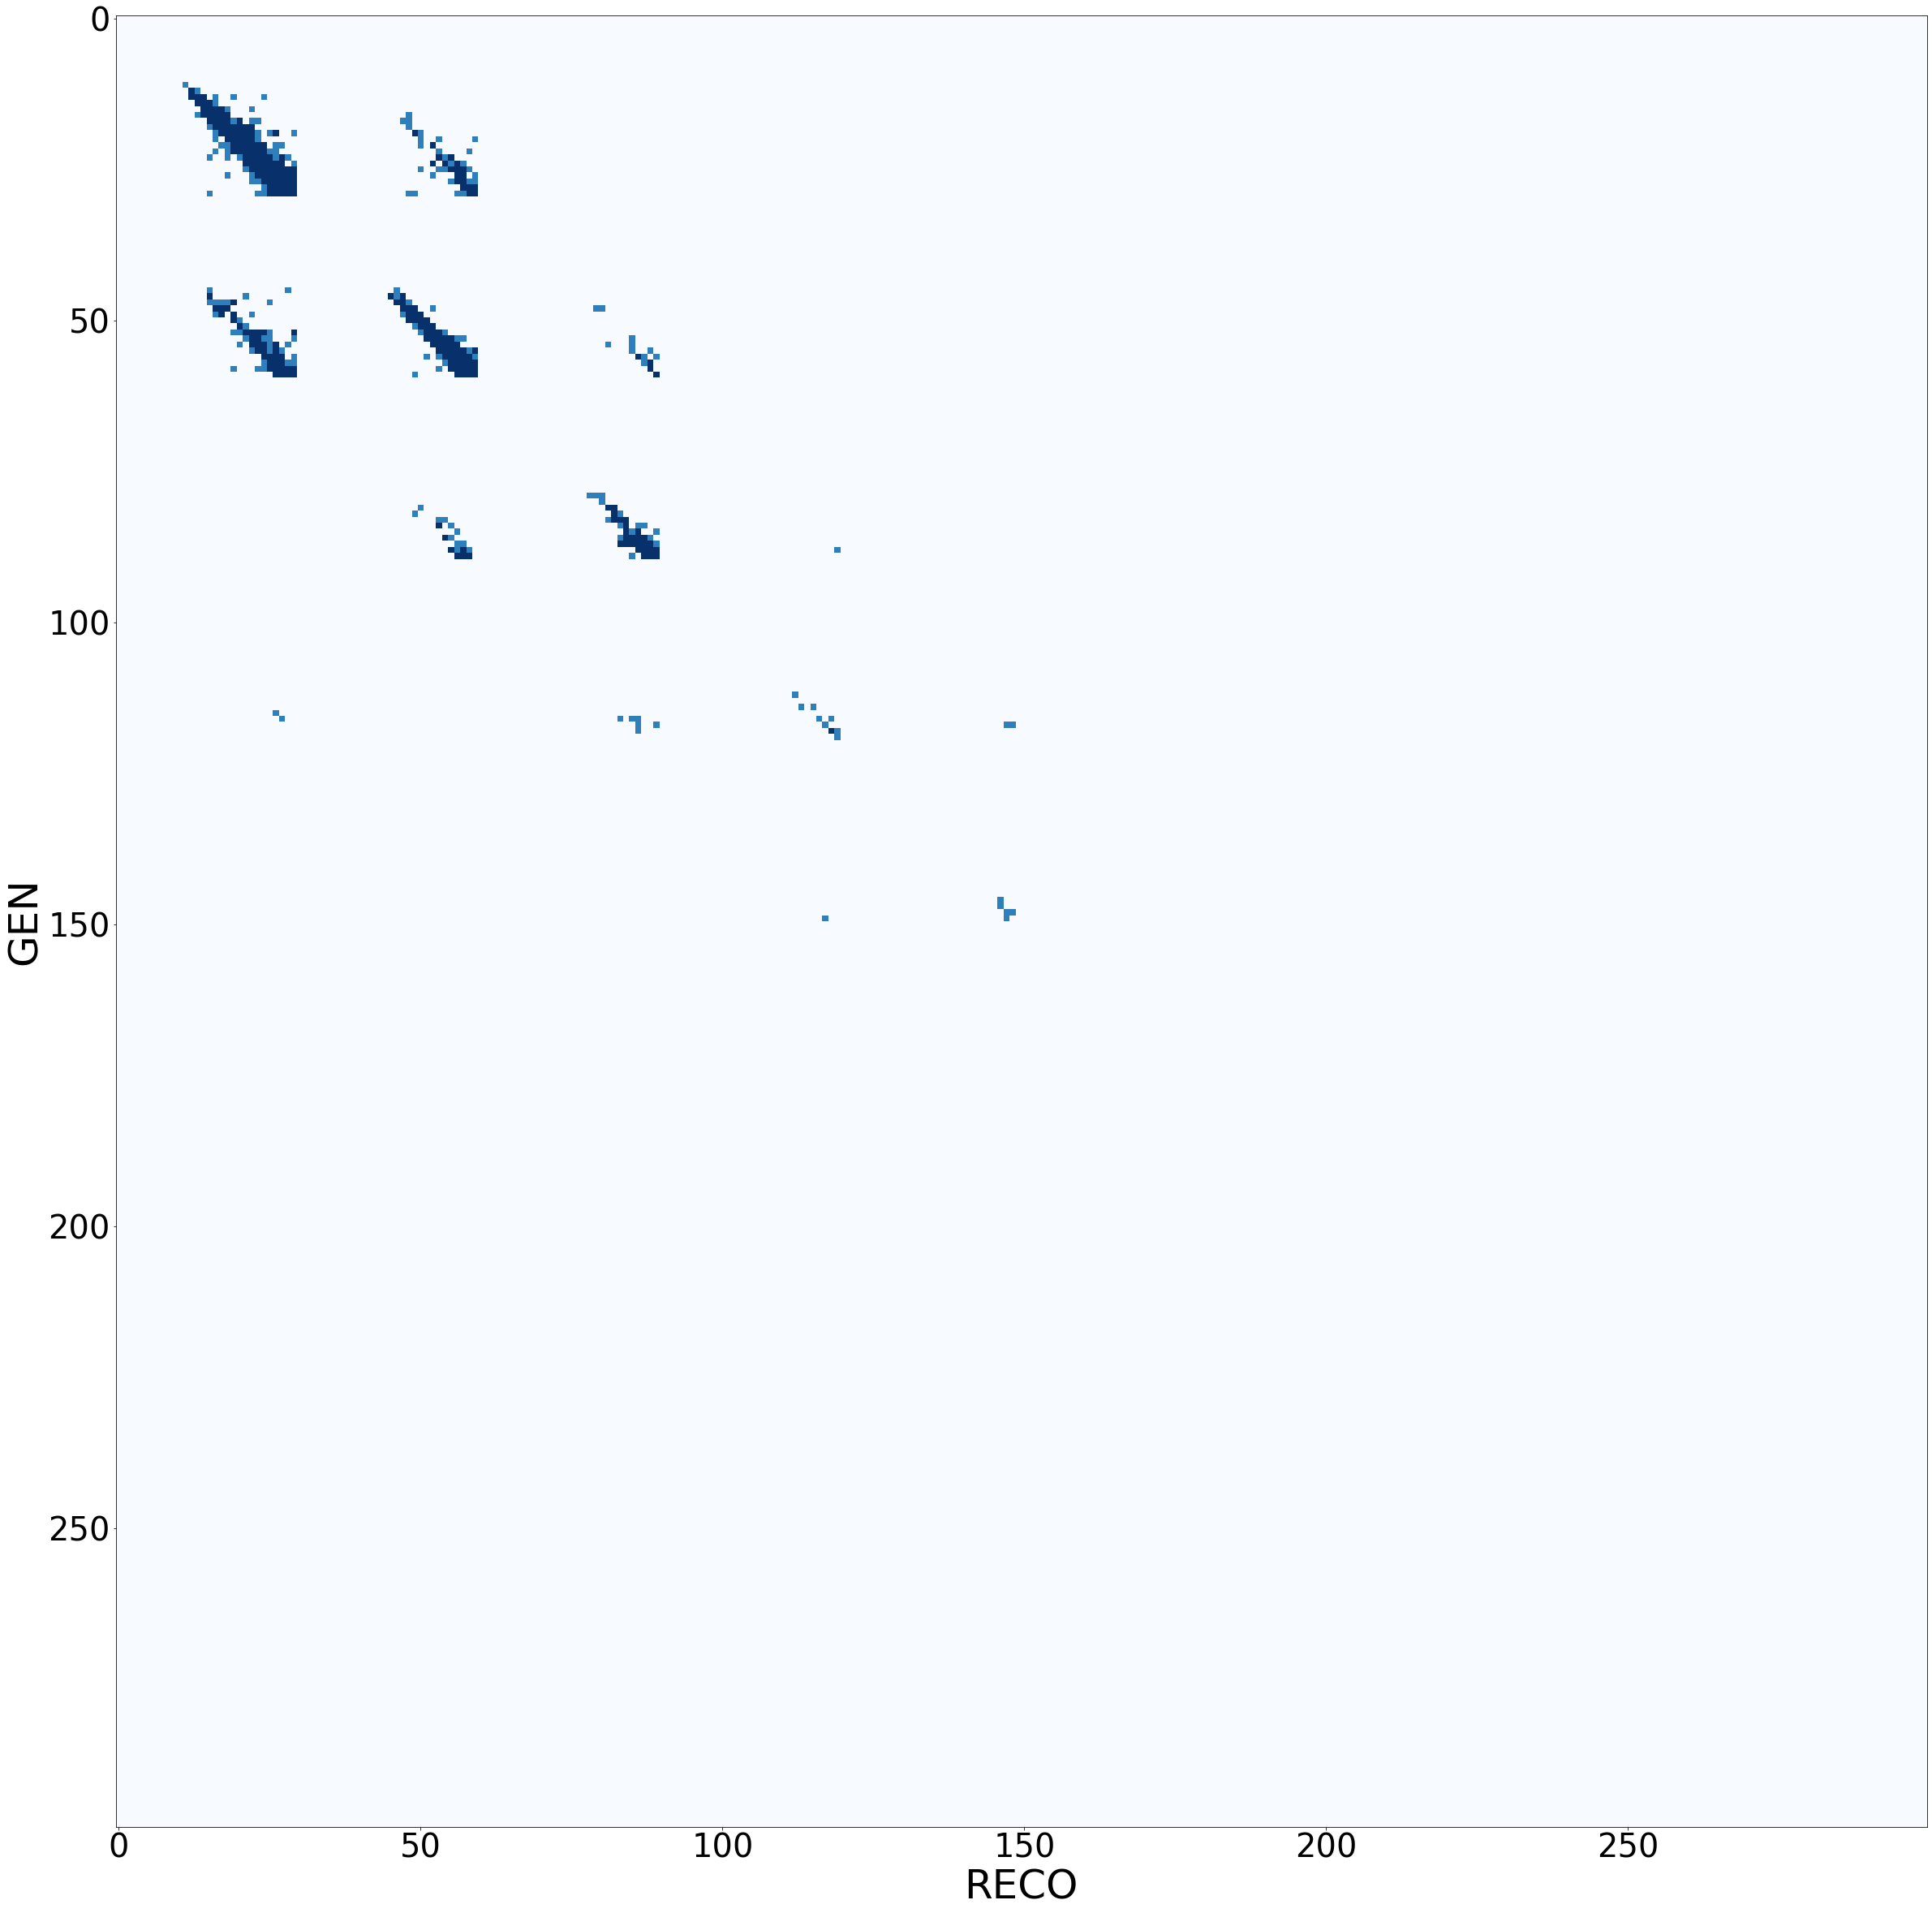

In [14]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_u_final+1), vmax=1, aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

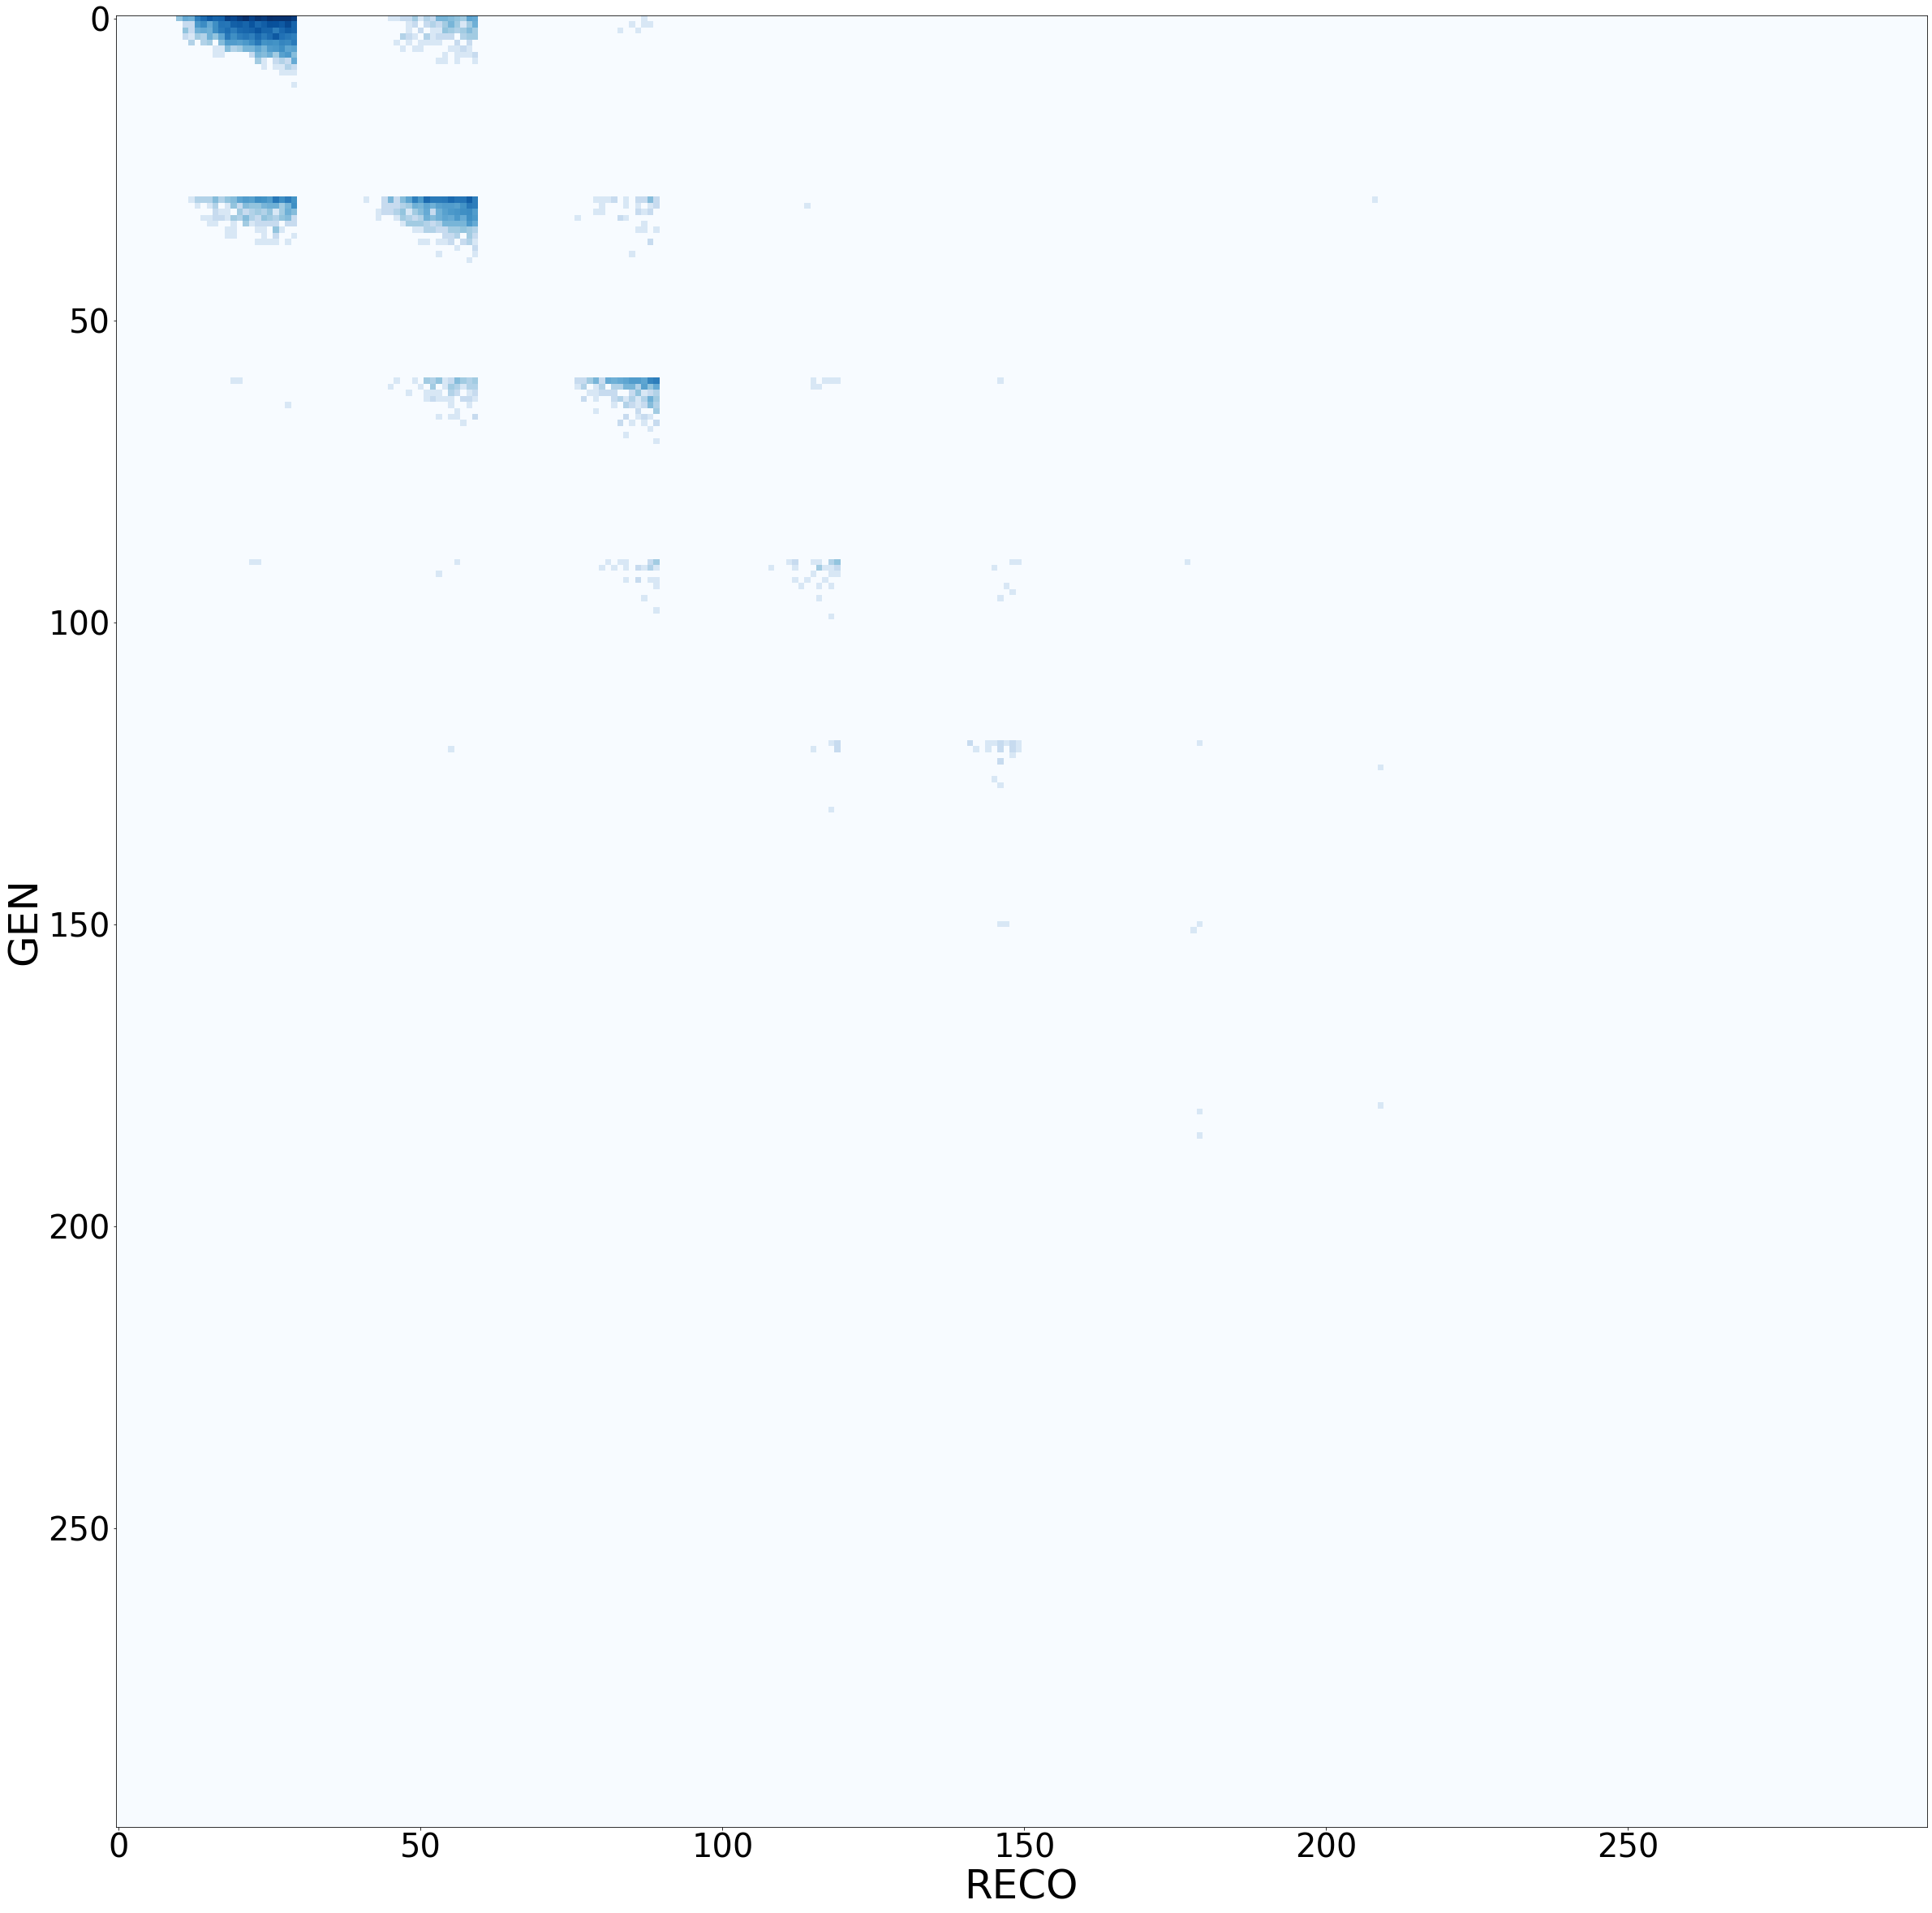

In [15]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_g_final+1), aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

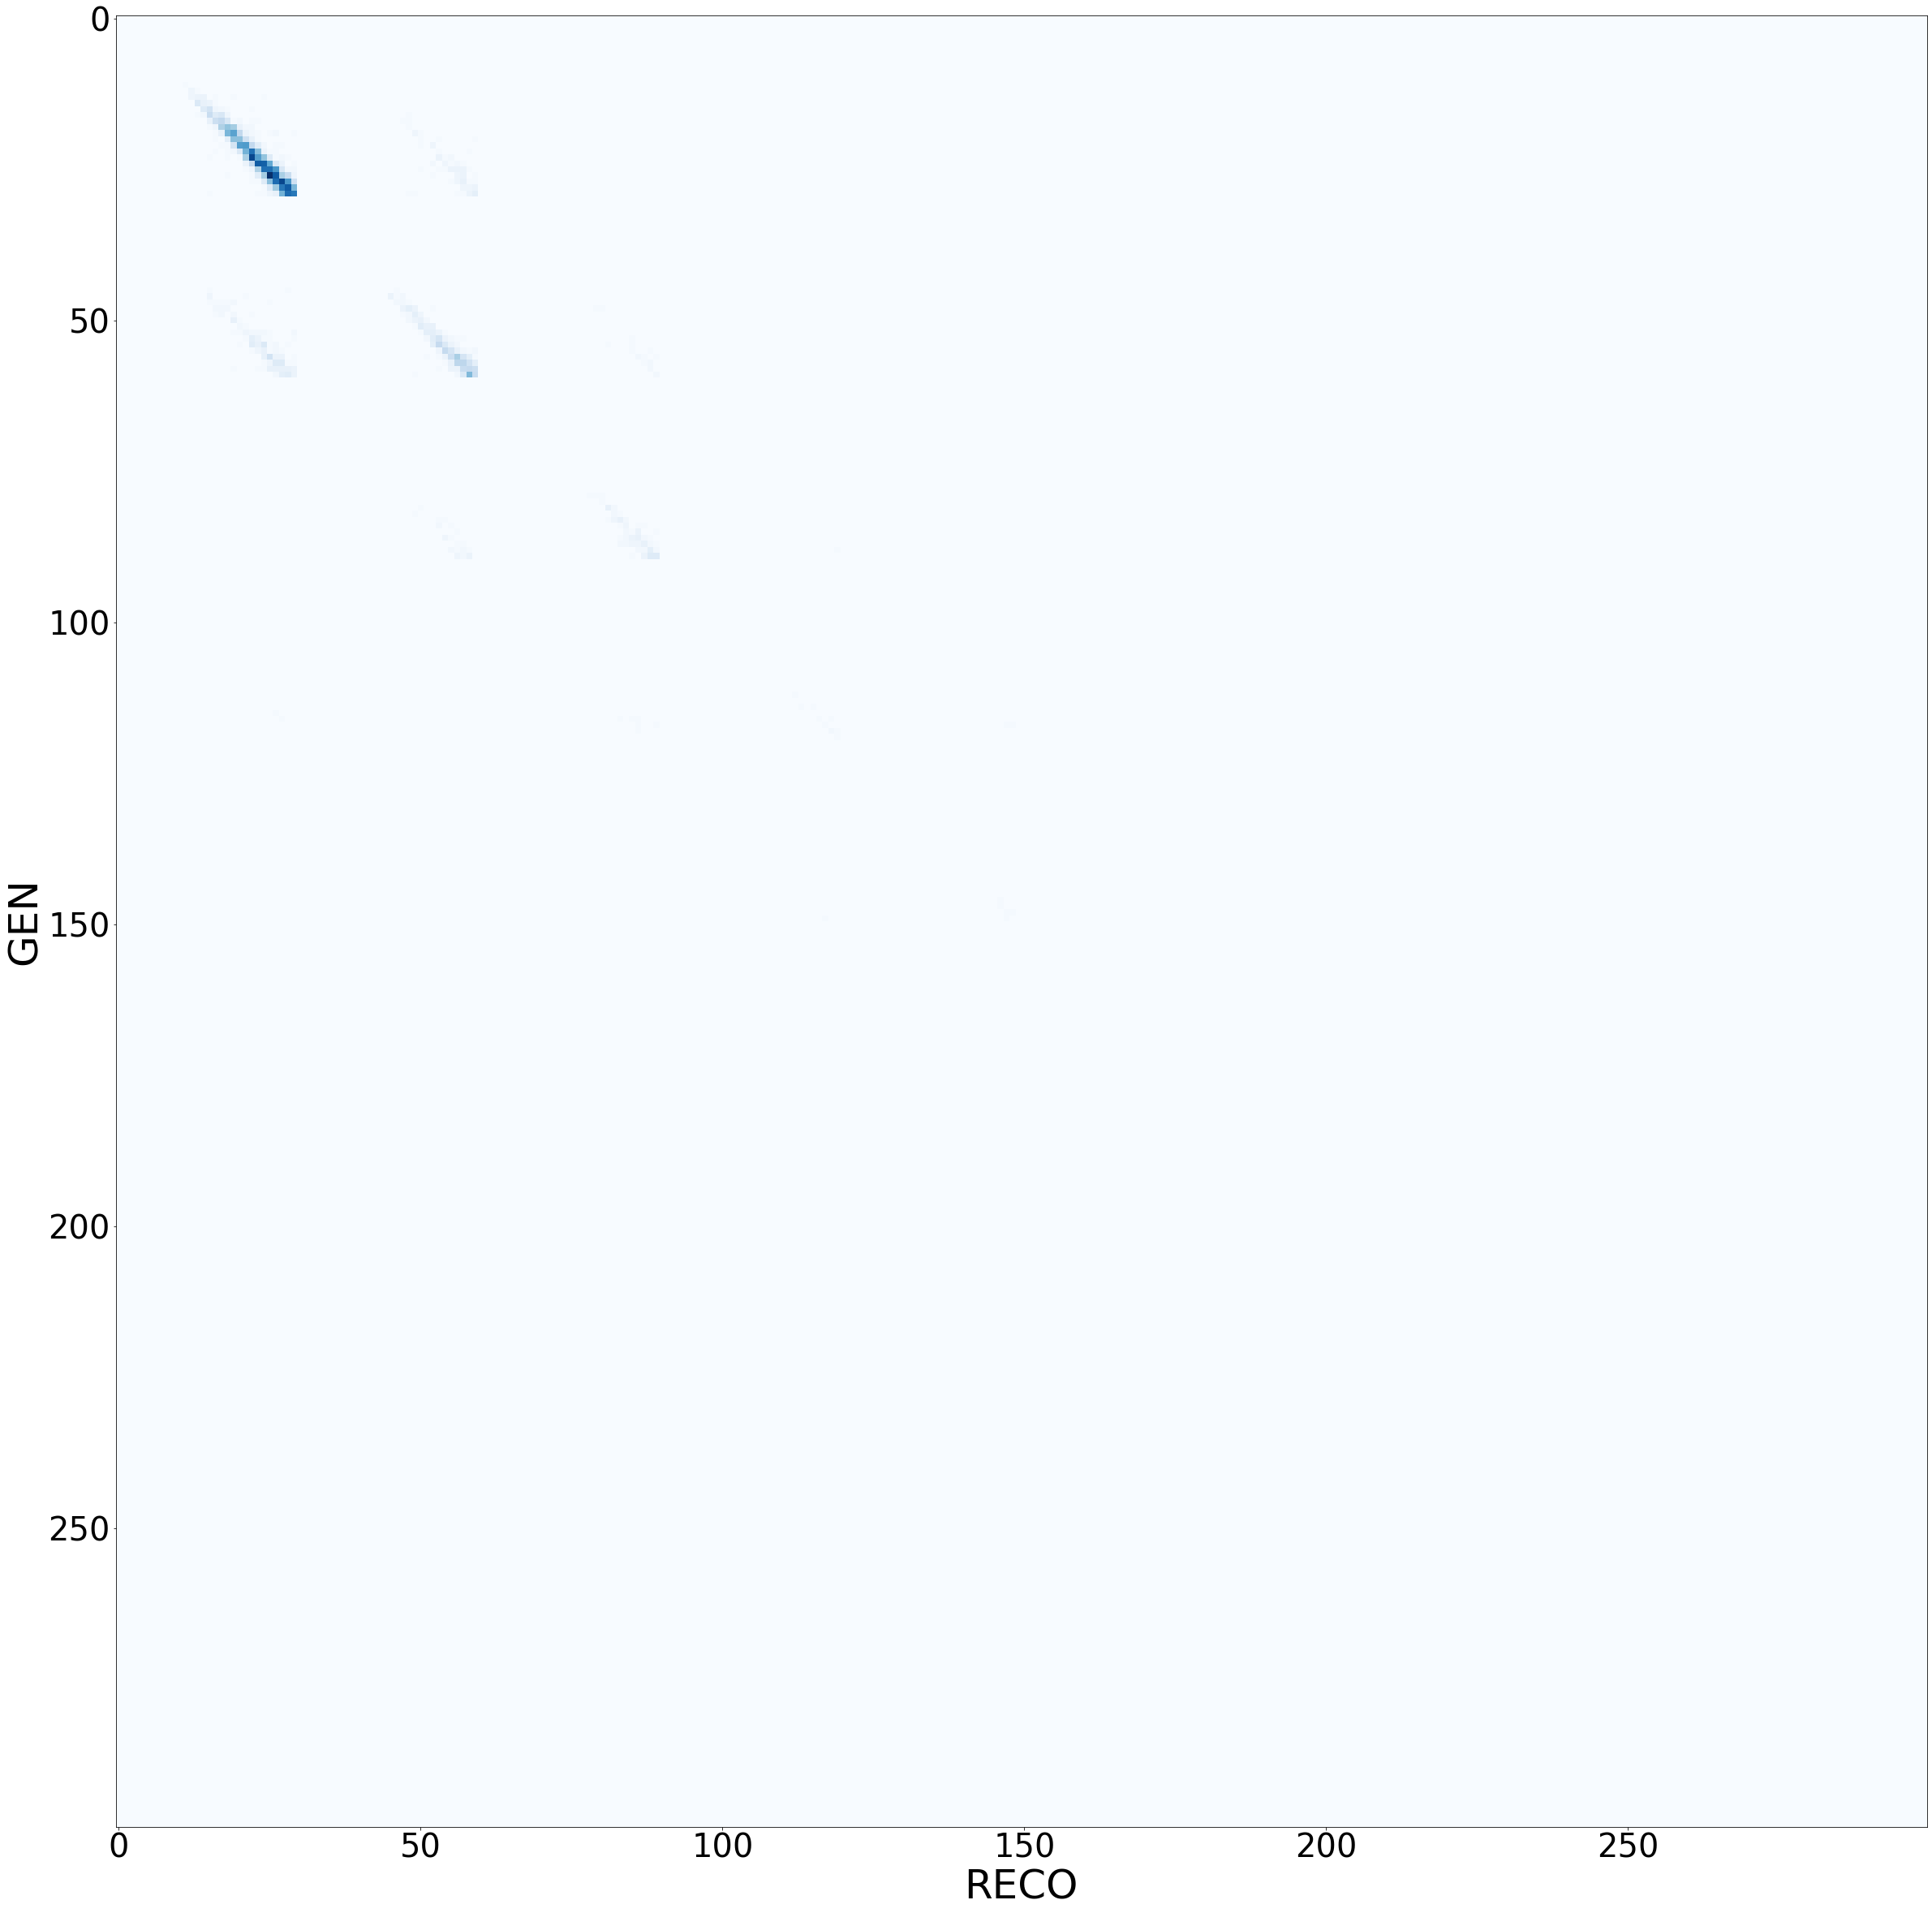

In [16]:
plt.figure(figsize = (40,80))
plt.imshow( response_matrix_u_final, aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)